##Deep Neural Network for Breast Cancer Classification


In [1]:
!pip install ucimlrepo

##Load the Data
It contains 569 samples of breast cancer cells, each with 30 features. The dataset is divided into two classes: benign and malignant

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# print the first few rows of the data
display(X.head())

# print the first few rows of the target
display(y.head())

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


,Diagnosis
0,M
1,M
2,M
3,M
4,M


In [3]:
display(f'X shape: {X.shape}')
display(f'y shape: {y.shape}')

'X shape: (569, 30)'

'y shape: (569, 1)'

As we can see, the dataset has 569 samples and 30 features. The target variable is the diagnosis column, which contains the class labels for each sample. The class labels are either 'M' (malignant) or 'B' (benign).

We will then check the distribution of the target variable.


In [4]:
display(y['Diagnosis'].value_counts())

,count
Diagnosis,
B,357
M,212


Note that the dataset is **imbalanced**, with more benign samples than malignant samples.

We will now process the data. Randomly choose 200 samples in 'M' (malignant) and 200 samples in 'B' (benign).


In [5]:
import pandas as pd

# Combine features and target into a single DataFrame for easier manipulation
data = pd.concat([X, y], axis=1)

# Separate the two classes
data_B = data[data['Diagnosis'] == 'B']
data_M = data[data['Diagnosis'] == 'M']

# Select 200 samples from each class
data_B = data_B.sample(n=200, random_state=42)
data_M = data_M.sample(n=200, random_state=42)

# Combine the two classes
balanced_data = pd.concat([data_B, data_M])

display(balanced_data['Diagnosis'].value_counts())

,count
Diagnosis,
B,200
M,200


There are 200 samples in each class, with a total of 400 samples. It means that the dataset is balanced.

We will use 80% of the samples for training and 20% for testing.


##Data Preprocessing


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

# Separate features and targets
X = balanced_data.drop('Diagnosis', axis=1)
y = balanced_data['Diagnosis']

# Convert the targets to binary labels
y = y.map({'B': 0, 'M': 1})

display(X)
display(y)

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
395,14.060,17.18,89.75,609.1,0.08045,0.05361,0.026810,0.03251,0.1641,0.05764,...,14.92,25.34,96.42,684.5,0.10660,0.12310,0.08460,0.07911,0.2523,0.06609
110,9.777,16.99,62.50,290.2,0.10370,0.08404,0.043340,0.01778,0.1584,0.07065,...,11.05,21.47,71.68,367.0,0.14670,0.17650,0.13000,0.05334,0.2533,0.08468
481,13.900,19.24,88.73,602.9,0.07991,0.05326,0.029950,0.02070,0.1579,0.05594,...,16.41,26.42,104.40,830.5,0.10640,0.14150,0.16730,0.08150,0.2356,0.07603
493,12.460,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.01149,0.1613,0.06013,...,13.19,16.36,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028
136,11.710,16.67,74.72,423.6,0.10510,0.06095,0.035920,0.02600,0.1339,0.05945,...,13.33,25.48,86.16,546.7,0.12710,0.10280,0.10460,0.06968,0.1712,0.07343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,15.320,17.27,103.20,713.3,0.13350,0.22840,0.244800,0.12420,0.2398,0.07596,...,17.73,22.66,119.80,928.8,0.17650,0.45030,0.44290,0.22290,0.3258,0.11910
328,16.270,20.71,106.90,813.7,0.11690,0.13190,0.147800,0.08488,0.1948,0.06277,...,19.28,30.38,129.80,1121.0,0.15900,0.29470,0.35970,0.15830,0.3103,0.08200
199,14.450,20.22,94.49,642.7,0.09872,0.12060,0.118000,0.05980,0.1950,0.06466,...,18.33,30.12,117.90,1044.0,0.15520,0.40560,0.49670,0.18380,0.4753,0.10130
194,14.860,23.21,100.40,671.4,0.10440,0.19800,0.169700,0.08878,0.1737,0.06672,...,16.08,27.78,118.60,784.7,0.13160,0.46480,0.45890,0.17270,0.3000,0.08701


,Diagnosis
395,0
110,0
481,0
493,0
136,0
...,...
257,1
328,1
199,1
194,1


In [7]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

display(f'X_train shape: {X_train.shape}')
display(f'y_train shape: {y_train.shape}')
display(f'X_test shape: {X_test.shape}')
display(f'y_test shape: {y_test.shape}')

'X_train shape: (320, 30)'

'y_train shape: (320,)'

'X_test shape: (80, 30)'

'y_test shape: (80,)'

In [8]:
from torch.utils.data import DataLoader, TensorDataset

# Standardize the data
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)
# Transform the test data using the same scaler
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
y_test = torch.tensor(y_test.values, dtype=torch.long)

# Create DataLoader for training and test sets
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)

##Build and Train the Neural Network Model


In [9]:
import torch.nn as nn

class ClassificationNet(nn.Module):
    def __init__(self, input_units=30, hidden_units=64, output_units=2):
        super(ClassificationNet, self).__init__()
        self.fc1 = nn.Linear(input_units, hidden_units)
        self.fc2 = nn.Linear(hidden_units, output_units)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model
model = ClassificationNet(input_units=30, hidden_units=64, output_units=2)

In [10]:
print(model)

ClassificationNet(
  (fc1): Linear(in_features=30, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
)


Then we define the loss function and optimizer. We use the `CrossEntropyLoss` loss function, which is commonly used for multi-class classification problems. The `Adam` optimizer is used to update the weights of the neural network during training.


In [11]:
import torch.optim as optim

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [12]:
epochs = 10
train_losses = []
test_losses = []

for epoch in range(epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # Evaluation phase on test set
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            test_outputs = model(X_batch)
            loss = criterion(test_outputs, y_batch)
            test_loss += loss.item()

    test_loss /= len(test_loader)
    test_losses.append(test_loss)

    print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

Epoch [1/10], Train Loss: 0.2469, Test Loss: 0.1883
Epoch [2/10], Train Loss: 0.1104, Test Loss: 0.1337
Epoch [3/10], Train Loss: 0.0863, Test Loss: 0.1157
Epoch [4/10], Train Loss: 0.0754, Test Loss: 0.1078
Epoch [5/10], Train Loss: 0.0664, Test Loss: 0.1020
Epoch [6/10], Train Loss: 0.0596, Test Loss: 0.0995
Epoch [7/10], Train Loss: 0.0570, Test Loss: 0.0898
Epoch [8/10], Train Loss: 0.0516, Test Loss: 0.0947
Epoch [9/10], Train Loss: 0.0448, Test Loss: 0.0985
Epoch [10/10], Train Loss: 0.0433, Test Loss: 0.0842


##Visualize the Training and Test Loss


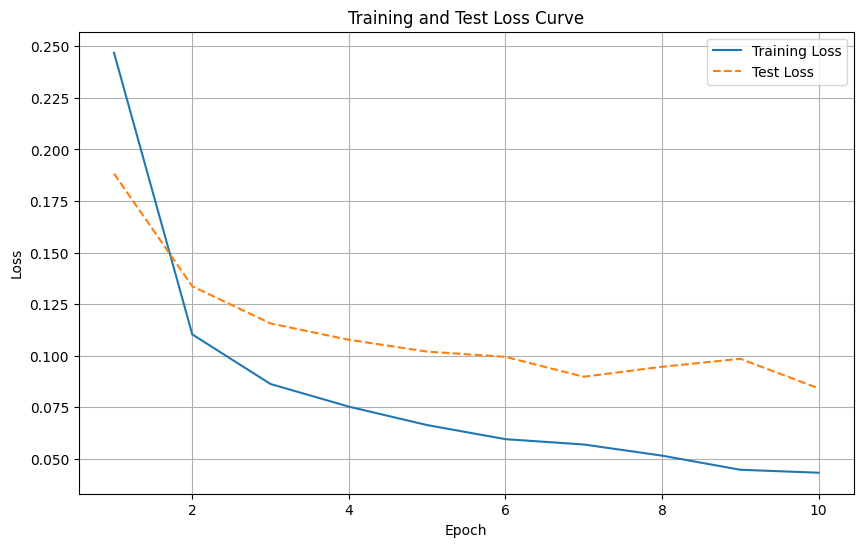

In [13]:
import matplotlib.pyplot as plt

# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

##Exercises


###Exercise 1 - Change to different optimizer: SGD

Stochastic Gradient Descent (SGD) is a widely used optimization algorithm in machine learning and deep learning for training models. It is an iterative method for optimizing a loss function by making small updates to the model parameters in the direction of the negative gradient.

**How SGD Works**

SGD updates the model's parameters iteratively. The update rule for each parameter $\theta$ is as follows:

$$ \theta = \theta - \eta \cdot \nabla_\theta J(\theta) $$

where:
- $\theta$ represents the model parameters.
- $\eta$ (eta) is the learning rate, which controls the step size of each update.
- $\nabla_\theta J(\theta)$ is the gradient of the loss function with respect to the parameter $\theta$.

**PyTorch's `torch.optim.SGD`**

In PyTorch, the `torch.optim.SGD` optimizer provides several parameters to configure its behavior.

**Parameters**

1. **`params`**:
   - The model parameters to optimize.
   - Typically provided as `model.parameters()`.

2. **`lr` (learning rate)**:
   - A positive float value that controls the step size for each parameter update.
   - Example: `lr=0.01`.

3. **`momentum`** (optional):
   - A float value that accelerates SGD in the relevant direction and dampens oscillations.
   - Example: `momentum=0.9`.

4. **`weight_decay`** (optional):
   - A float value representing the L2 penalty (regularization term) to prevent overfitting.
   - Example: `weight_decay=0.0001`.

5. **`dampening`** (optional):
   - A float value that reduces the effect of the momentum.
   - Default is `0`.

**Example Usage**

Here’s how you can use `torch.optim.SGD` with some of these parameters:

```python
import torch.optim as optim

# Define the SGD optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0001)
```


Epoch [1/10], Train Loss: 0.3509, Test Loss: 0.2764
Epoch [2/10], Train Loss: 0.1790, Test Loss: 0.1974
Epoch [3/10], Train Loss: 0.1311, Test Loss: 0.1654
Epoch [4/10], Train Loss: 0.1100, Test Loss: 0.1462
Epoch [5/10], Train Loss: 0.0971, Test Loss: 0.1371
Epoch [6/10], Train Loss: 0.0888, Test Loss: 0.1297
Epoch [7/10], Train Loss: 0.0836, Test Loss: 0.1255
Epoch [8/10], Train Loss: 0.0790, Test Loss: 0.1234
Epoch [9/10], Train Loss: 0.0760, Test Loss: 0.1189
Epoch [10/10], Train Loss: 0.0732, Test Loss: 0.1168


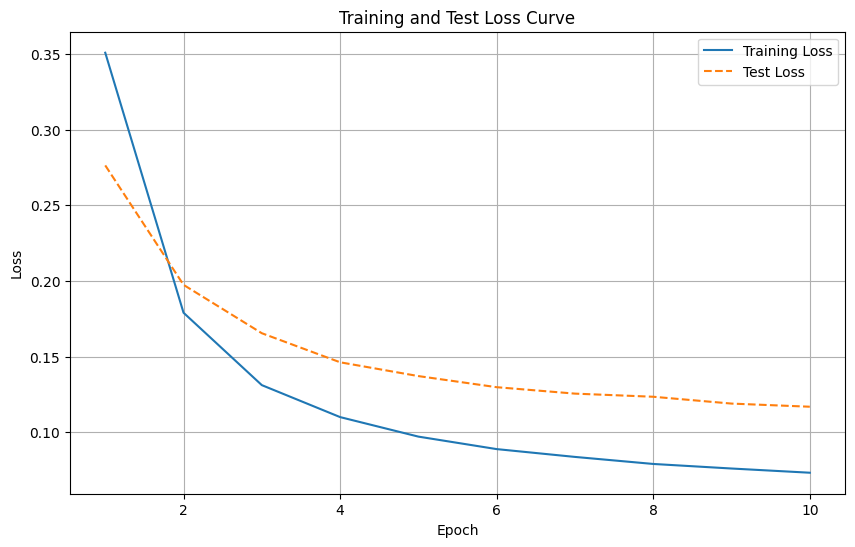

In [14]:
import torch.optim as optim

model_new_optimizer = ClassificationNet(input_units=30, hidden_units=64, output_units=2)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model_new_optimizer.parameters(), lr=0.001) # Here, change the optimizer to SGD
optimizer = optim.SGD(model_new_optimizer.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0001)

epochs = 10
train_losses = []
test_losses = []

for epoch in range(epochs):
    # Training phase
    model_new_optimizer.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model_new_optimizer(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # Evaluation phase on test set
    model_new_optimizer.eval()
    test_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            test_outputs = model_new_optimizer(X_batch)
            loss = criterion(test_outputs, y_batch)
            test_loss += loss.item()

    test_loss /= len(test_loader)
    test_losses.append(test_loss)

    print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

import matplotlib.pyplot as plt

# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

###Exercise 2 - Change the number of neurons

Define a new neural network architecture with different neurons and see how it affects the model's performance.


Epoch [1/10], Train Loss: 0.4172, Test Loss: 0.2738
Epoch [2/10], Train Loss: 0.1653, Test Loss: 0.1796
Epoch [3/10], Train Loss: 0.1199, Test Loss: 0.1470
Epoch [4/10], Train Loss: 0.1001, Test Loss: 0.1274
Epoch [5/10], Train Loss: 0.0883, Test Loss: 0.1198
Epoch [6/10], Train Loss: 0.0809, Test Loss: 0.1165
Epoch [7/10], Train Loss: 0.0763, Test Loss: 0.1096
Epoch [8/10], Train Loss: 0.0716, Test Loss: 0.1070
Epoch [9/10], Train Loss: 0.0686, Test Loss: 0.0997
Epoch [10/10], Train Loss: 0.0652, Test Loss: 0.0974


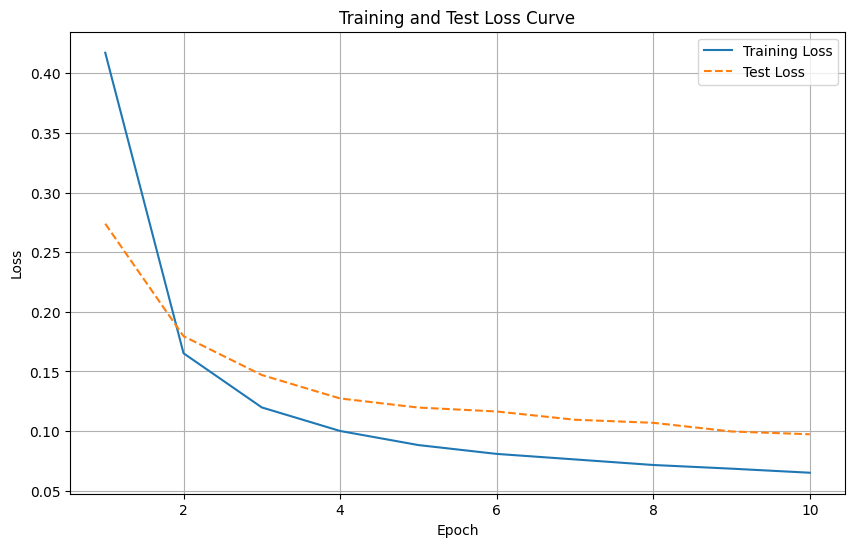

In [15]:
# Change the number of hidden units, e.g. 16.
model_new = ClassificationNet(input_units=30, hidden_units=16, output_units=2)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_new.parameters(), lr=0.001)

epochs = 10
train_losses = []
test_losses = []

for epoch in range(epochs):
    # Training phase
    model_new.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model_new(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # Evaluation phase on test set
    model_new.eval()
    test_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            test_outputs = model_new(X_batch)
            loss = criterion(test_outputs, y_batch)
            test_loss += loss.item()

    test_loss /= len(test_loader)
    test_losses.append(test_loss)

    print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

import matplotlib.pyplot as plt

# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

###Exercise 3 - Try different dataset - Iris Dataset

Try using the [Iris dataset](https://archive.ics.uci.edu/dataset/53/iris) for classification. The Iris dataset is a classic dataset used for classification tasks. It contains 150 samples of iris flowers, each with 4 features. The dataset is divided into three classes, with each class representing a different species of iris flower. The goal is to classify the iris flowers into one of the three classes.

This dataset is free to use and is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.

You can load the Iris dataset using the following code:

```python
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Extract the features and target variable
X_iris = iris.data
y_iris = iris.target
```

You can then preprocess the data, build and train the neural network model, and evaluate its performance on the test set.


Epoch [1/50], Train Loss: 0.9574, Test Loss: 0.8891
Epoch [2/50], Train Loss: 0.8345, Test Loss: 0.7769
Epoch [3/50], Train Loss: 0.7240, Test Loss: 0.6811
Epoch [4/50], Train Loss: 0.6181, Test Loss: 0.6043
Epoch [5/50], Train Loss: 0.5436, Test Loss: 0.5484
Epoch [6/50], Train Loss: 0.4905, Test Loss: 0.5074
Epoch [7/50], Train Loss: 0.4502, Test Loss: 0.4751
Epoch [8/50], Train Loss: 0.4095, Test Loss: 0.4446
Epoch [9/50], Train Loss: 0.3785, Test Loss: 0.4166
Epoch [10/50], Train Loss: 0.3488, Test Loss: 0.3922
Epoch [11/50], Train Loss: 0.3289, Test Loss: 0.3702
Epoch [12/50], Train Loss: 0.3062, Test Loss: 0.3496
Epoch [13/50], Train Loss: 0.2839, Test Loss: 0.3316
Epoch [14/50], Train Loss: 0.2697, Test Loss: 0.3140
Epoch [15/50], Train Loss: 0.2536, Test Loss: 0.2986
Epoch [16/50], Train Loss: 0.2419, Test Loss: 0.2824
Epoch [17/50], Train Loss: 0.2237, Test Loss: 0.2644
Epoch [18/50], Train Loss: 0.2090, Test Loss: 0.2487
Epoch [19/50], Train Loss: 0.1964, Test Loss: 0.2337
Ep

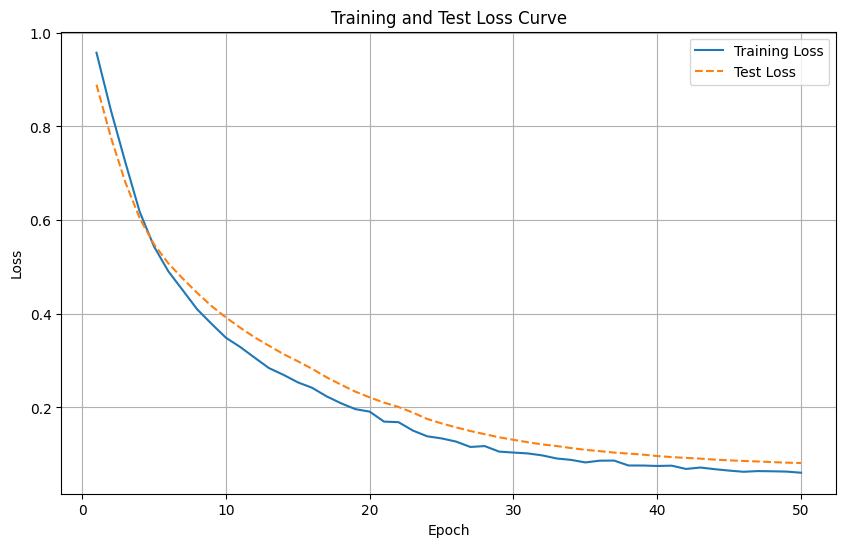

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()

# Extract the features and target variable
X_iris = iris.data
y_iris = iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42, stratify=y_iris)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader for training and test sets
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class IrisNet(nn.Module):
    def __init__(self, hidden_units=8):
        super(IrisNet, self).__init__()
        self.fc1 = nn.Linear(4, hidden_units)  # 4 input features for Iris dataset
        self.fc2 = nn.Linear(hidden_units, 3)  # 3 output classes for Iris dataset

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = IrisNet(hidden_units=8)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 50
train_losses = []
test_losses = []

for epoch in range(epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Evaluation phase on test set
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            test_outputs = model(X_batch)
            loss = criterion(test_outputs, y_batch)
            test_loss += loss.item()

    avg_test_loss = test_loss / len(test_loader)
    test_losses.append(avg_test_loss)

    print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}')

# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()
plt.grid(True)
plt.show()